In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import calendar
import gmaps
#from config import g_key

degrees = 45
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October']

In [2]:
mta_path = "Repository/body.csv"

mta_df = pd.read_csv(mta_path)

mta_df

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits
0,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-01,5812.0,6659.0
1,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-02,15506.0,14307.0
2,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-03,15959.0,14500.0
3,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-04,9265.0,9161.0
4,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-05,7191.0,7743.0
...,...,...,...,...,...,...,...,...,...,...,...,...
131649,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068632,40.730304,R552,2020-10-19,9500.0,8319.0
131650,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068632,40.730304,R552,2020-10-20,23744.0,18923.0
131651,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068632,40.730304,R552,2020-10-21,24057.0,19281.0
131652,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068632,40.730304,R552,2020-10-22,9761.0,8563.0


In [3]:
covid_path = "Repository/data-HdO5F.csv"

covid_df = pd.read_csv(covid_path)

covid_df = covid_df[['DATE_OF_INTEREST', 'Cases']]

covid_df = covid_df.rename(columns={'DATE_OF_INTEREST': 'date'})

covid_df.head()

,date,Cases
0,2/29/2020,1
1,3/3/2020,1
2,3/4/2020,5
3,3/5/2020,3
4,3/6/2020,8


In [4]:
covid_df['date'] = pd.to_datetime(covid_df.date)
covid_df['date'] = covid_df['date'].astype(str)

mta_covid=pd.merge(mta_df, covid_df, on='date', how="left")

mta_covid.fillna(value=0, inplace=True)

mta_covid

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits,Cases
0,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-01,5812.0,6659.0,0.0
1,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-02,15506.0,14307.0,0.0
2,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-03,15959.0,14500.0,0.0
3,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-04,9265.0,9161.0,0.0
4,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-05,7191.0,7743.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131649,Journal Sq,0,PTH,0,0,0,-74.068632,40.730304,R552,2020-10-19,9500.0,8319.0,546.0
131650,Journal Sq,0,PTH,0,0,0,-74.068632,40.730304,R552,2020-10-20,23744.0,18923.0,494.0
131651,Journal Sq,0,PTH,0,0,0,-74.068632,40.730304,R552,2020-10-21,24057.0,19281.0,536.0
131652,Journal Sq,0,PTH,0,0,0,-74.068632,40.730304,R552,2020-10-22,9761.0,8563.0,526.0


In [5]:
mta_df.columns

Index(['stop_name', 'daytime_routes', 'division', 'line', 'borough',
       'structure', 'gtfs_longitude', 'gtfs_latitude', 'complex_id', 'date',
       'entries', 'exits'],
      dtype='object')

In [6]:
mta_df_monthly = mta_df.set_index(['date'])

mta_df_monthly.index = pd.to_datetime(mta_df_monthly.index)

mta_df_monthly['day'] = mta_df_monthly.index.day
mta_df_monthly['month'] = mta_df_monthly.index.month
mta_df_monthly['year'] = mta_df_monthly.index.year

mta_df_monthly["month"] = pd.to_datetime(mta_df_monthly["month"], format='%m').dt.month_name()

mta_df_monthly

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,entries,exits,day,month,year
date,,,,,,,,,,,,,,
2020-01-01,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,5812.0,6659.0,1,January,2020
2020-01-02,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,15506.0,14307.0,2,January,2020
2020-01-03,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,15959.0,14500.0,3,January,2020
2020-01-04,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,9265.0,9161.0,4,January,2020
2020-01-05,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,7191.0,7743.0,5,January,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-19,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068632,40.730304,R552,9500.0,8319.0,19,October,2020
2020-10-20,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068632,40.730304,R552,23744.0,18923.0,20,October,2020
2020-10-21,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068632,40.730304,R552,24057.0,19281.0,21,October,2020


In [7]:
mta_df_grouped = mta_df.groupby(mta_df['date'])['entries'].sum()

mta_df_grouped

date
2020-01-01    2419171.0
2020-01-02    5277939.0
2020-01-03    5224641.0
2020-01-04    2921789.0
2020-01-05    2369956.0
                ...    
2020-10-19    1704718.0
2020-10-20    1777332.0
2020-10-21    1805682.0
2020-10-22    1797361.0
2020-10-23    1658918.0
Name: entries, Length: 297, dtype: float64

In [8]:
# x = month_ave['Month']
# y = month_ave['Retail Change %']
# y2 = month_ave['Cases']
# fig, ax1 = plt.subplots()
# color = 'blue'
# ax1.set_xlabel('Month')
# ax1.set_ylabel('% Changes', color=color)
# ax1.plot(x,y,color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()

# color = 'green'
# ax2.set_ylabel('Cases', color=color)
# ax2.plot(x,y2,color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()
# plt.show()

# plt.savefig(os.path.join(outputfilepath, "Retail Change % vs Cases"))

In [9]:
mta_covid_cases = mta_covid.groupby(mta_covid['date'])['Cases'].sum()

mta_covid_entries = mta_covid.groupby(mta_covid['date'])['entries'].sum()

mta_covid_df = mta_covid_cases.to_frame().join(mta_covid_entries)

mta_covid_df.reset_index()

mta_covid_df

,Cases,entries
date,,
2020-01-01,0.0,2419171.0
2020-01-02,0.0,5277939.0
2020-01-03,0.0,5224641.0
2020-01-04,0.0,2921789.0
2020-01-05,0.0,2369956.0
...,...,...
2020-10-19,241878.0,1704718.0
2020-10-20,218842.0,1777332.0
2020-10-21,237448.0,1805682.0


<function matplotlib.pyplot.show(close=None, block=None)>

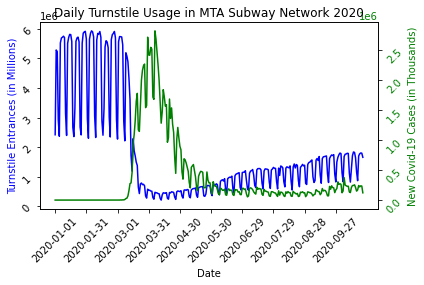

In [10]:
# plt.plot(mta_df_grouped)
# plt.title("Daily Turnstile Usage in MTA Subway Network 2020")
# plt.xlabel("Date")
# plt.ylabel("Turnstile Entrances (in Millions)")

# ax = plt.gca()
# ticks_to_use = mta_df_grouped.index[::30]
# ax.set_xticks(ticks_to_use)

# plt.xticks(rotation=degrees)

# plt.savefig("Graph-Data/Daily_MTA_Turnstile.png")

# plt.show

mta_y = mta_covid_df['Cases']
mta_x = mta_covid_df.index
mta_y2 = mta_covid_df['entries']

fig10, ax10 = plt.subplots()
ax10_1_color = 'blue'
ax10.set_xlabel('Date')
ax10.set_ylabel('Turnstile Entrances (in Millions)', color = ax10_1_color)
ax10.plot(mta_x, mta_y2, color=ax10_1_color)

ax10 = plt.gca()
ticks_to_use = mta_covid_df.index[::30]
ax10.set_xticks(ticks_to_use)
ax10.tick_params(labelrotation=45)

ax11 = ax10.twinx()

ax11_1_color = 'green'
ax11.set_ylabel('New Covid-19 Cases (in Thousands)', color = ax11_1_color)
ax11.plot(mta_x, mta_y, color = ax11_1_color)
ax11.tick_params(axis='y', labelcolor=ax11_1_color)

ax11 = plt.gca()
ticks_to_use = mta_covid_df.index[::30]
ax11.set_xticks(ticks_to_use)
ax11.tick_params(labelrotation=45)

fig10.tight_layout()

plt.title("Daily Turnstile Usage in MTA Subway Network 2020")

plt.savefig("Graph-Data/Daily_MTA_Turnstile.png")

plt.show

In [11]:
mta_df_monthly = mta_covid.set_index(['date']).copy()

mta_df_monthly.index = pd.to_datetime(mta_df_monthly.index)

mta_df_monthly['day'] = mta_df_monthly.index.day
mta_df_monthly['month'] = mta_df_monthly.index.month
mta_df_monthly['year'] = mta_df_monthly.index.year

mta_df_monthly["month"] = pd.to_datetime(mta_df_monthly["month"], format='%m').dt.month_name()

mta_df_monthly

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,entries,exits,Cases,day,month,year
date,,,,,,,,,,,,,,,
2020-01-01,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,5812.0,6659.0,0.0,1,January,2020
2020-01-02,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,15506.0,14307.0,0.0,2,January,2020
2020-01-03,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,15959.0,14500.0,0.0,3,January,2020
2020-01-04,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,9265.0,9161.0,0.0,4,January,2020
2020-01-05,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,7191.0,7743.0,0.0,5,January,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-19,Journal Sq,0,PTH,0,0,0,-74.068632,40.730304,R552,9500.0,8319.0,546.0,19,October,2020
2020-10-20,Journal Sq,0,PTH,0,0,0,-74.068632,40.730304,R552,23744.0,18923.0,494.0,20,October,2020
2020-10-21,Journal Sq,0,PTH,0,0,0,-74.068632,40.730304,R552,24057.0,19281.0,536.0,21,October,2020


In [12]:
mta_month_mean = mta_df_monthly.groupby(mta_df_monthly['month']).mean()

month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October']

mta_month_mean = mta_month_mean.reindex(month_list)

mta_month_mean

,gtfs_longitude,gtfs_latitude,entries,exits,Cases,day,year
month,,,,,,,
January,-73.936038,40.729722,10583.556843,8683.415610,0.000000,16.003717,2020.0
February,-73.936080,40.729669,10598.949556,8708.854585,0.034485,14.998988,2020.0
March,-73.936082,40.729695,5601.157780,4768.963869,2102.358392,15.995265,2020.0
April,-73.936069,40.729686,949.872432,1043.760367,3644.373824,15.502521,2020.0
May,-73.887652,40.702991,1186.277907,1286.466308,917.860064,16.006768,2020.0
June,-73.769552,40.637933,1874.057057,1963.239565,362.566667,15.500000,2020.0
July,-73.839291,40.676350,2423.023855,2525.104727,316.454182,16.005164,2020.0
August,-73.769442,40.637806,2584.506071,2730.090076,239.259106,16.000727,2020.0
September,-73.780630,40.644036,3204.098138,3248.329179,344.222856,15.497898,2020.0


In [13]:
# fig10, ax10 = plt.subplots()
# ax10_1_color = 'blue'
# ax10.set_xlabel('Date')
# ax10.set_ylabel('Turnstile Entrances (in Millions)', color = ax10_1_color)
# ax10.plot(mta_x, mta_y2, color=ax10_1_color)

# ax10 = plt.gca()
# ticks_to_use = mta_covid_df.index[::30]
# ax10.set_xticks(ticks_to_use)
# ax10.tick_params(labelrotation=45)

# ax11 = ax10.twinx()

# ax11_1_color = 'green'
# ax11.set_ylabel('Covid-19 Cases (in Thousands)', color = ax11_1_color)
# ax11.plot(mta_x, mta_y, color = ax11_1_color)
# ax11.tick_params(axis='y', labelcolor=ax11_1_color)

# ax11 = plt.gca()
# ticks_to_use = mta_covid_df.index[::30]
# ax11.set_xticks(ticks_to_use)
# ax11.tick_params(labelrotation=45)

# fig10.tight_layout()

# plt.savefig("Graph-Data/Daily_MTA_Turnstile.png")

# plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

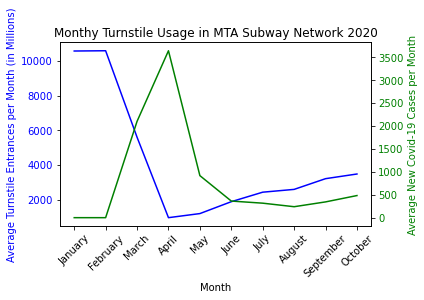

In [21]:
#### COVID/MONTH OUTLOOK FOR CLEANER CHART TO USE AS WELL

# cm_() means Covid/Month_(variable)
cm_x = mta_month_mean.index
cm_y = mta_month_mean['entries']
cm_y2 = mta_month_mean['Cases']

fig, ax12 = plt.subplots()
ax12_color = 'blue'
ax12.set_xlabel('Month')
ax12.set_ylabel('Average Turnstile Entrances per Month (in Millions)', color=ax12_color)
ax12.plot(cm_x, cm_y, color=ax12_color)
ax12.tick_params(axis='y', labelcolor=ax12_color)

ax13 = ax12.twinx()

ax13_color = 'green'
ax13.set_ylabel('Average New Covid-19 Cases per Month', color=ax13_color)
ax13.plot(cm_x, cm_y2, color=ax13_color)
ax13.tick_params(axis='y', labelcolor=ax13_color)

plt.title("Monthy Turnstile Usage in MTA Subway Network 2020")
ax12.tick_params(axis='x', labelrotation=45)
ax13.tick_params(axis='x', labelrotation=45)

fig.tight_layout()

plt.savefig("Graph-Data/Monthly_MTA_Turnstile.png")
plt.show

In [15]:
mta_df_locations = mta_df_monthly.dropna()

mta_df_locations_grouped = mta_df_locations.groupby(['stop_name', 'month']).agg({'entries': ['mean'], 'gtfs_latitude': ['max'], 'gtfs_longitude': ['max']})

mta_df_locations_grouped_jan = mta_df_locations_grouped.loc


In [16]:
# gmaps.configure(api_key=g_key)

# entries = mta_df_locations_grouped['entries'].astype(float)

# locations = mta_df_locations_grouped[["gtfs_latitude", "gtfs_longitude"]].astype(float)

# fig = gmaps.figure

# layer_1 = gmaps.heatmap_layer(locations, weights=entries, dissipating=False, max_intensity=100, point_radius=1)

# fig

In [17]:
# #### COMPARE DIRECT WITH COVID DATA ####
# covid_path = "Repository/data-HdO5F.csv"

# covid_df = pd.read_csv(covid_path)

# covid_df = covid_df[['DATE_OF_INTEREST', 'Cases']]

# covid_df = covid_df.rename(columns={'DATE_OF_INTEREST': 'date'})

# covid_df.head()

In [18]:
# covid_df['date'] = pd.to_datetime(covid_df.date)
# covid_df['date'] = covid_df['date'].astype(str)

# mta_covid=pd.merge(mta_df, covid_df, on='date', how="left")

# mta_covid